In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df1 = pd.read_table('./data/income/adult.data', delimiter=',', header=None)  # if tab-separated

df2 = pd.read_table('./data/income/adult.test', delimiter=',', header=None)  # if tab-separated

# Merge train and test dataframes
df = pd.concat([df1, df2])

In [16]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'target']

In [17]:
contains_question_mark = df.applymap(lambda x: ' ?' in str(x)).any().any()

print("Does the DataFrame contain '?' anywhere?", contains_question_mark)

# If yes, count the occurrences
if contains_question_mark:
    count_question_marks = (df.applymap(lambda x: x == ' ?')).sum().sum()
    print("Number of occurrences of ' ?':", count_question_marks)


Does the DataFrame contain '?' anywhere? True
Number of occurrences of ' ?': 6465


In [18]:
df = df.replace(' ?', pd.NA)
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
target               0
dtype: int64

In [19]:
df.dropna(inplace=True)

In [27]:

df_new = pd.get_dummies(df, columns=['target'], drop_first=True)
df.target.unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [28]:
def modify_value(value):
    # Example condition: if the value is greater than 10, change it to 100, else change it to 0
    if value == ' <=50K' or value == ' <=50K.':
        return 0
    else:
        return 1

# Apply the function to the column using apply()
df['target'] = df['target'].apply(modify_value)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [29]:
X = df.drop('target', axis=1)
y = df.target

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=00000)

In [31]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols = ['workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'sex', 'native-country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [32]:
X_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
11140,18,1,190325,1,7,1,1,1,1,1,0,0,30,1
9900,41,1,107845,2,13,2,2,2,1,2,0,0,40,1
2903,42,1,200574,3,10,2,3,3,1,1,0,0,40,1
19409,20,1,164219,4,9,1,4,1,1,1,0,0,45,1
12432,40,1,110028,3,10,2,1,3,1,1,0,0,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,29,1,100293,3,10,1,2,4,1,2,0,0,40,1
22924,39,6,188069,10,11,2,5,3,1,1,0,0,60,1
13444,58,3,290670,2,13,2,5,3,1,1,0,0,55,1
14479,56,1,70857,4,9,2,5,3,1,1,0,0,40,1


In [33]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=20, random_state=00000)

In [34]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [35]:
y_train_pred_rf = random_forest.predict(X_train)
y_test_pred_rf = random_forest.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)

test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print(train_accuracy_rf, test_accuracy_rf)

0.9959564049913125 0.8478661457949436


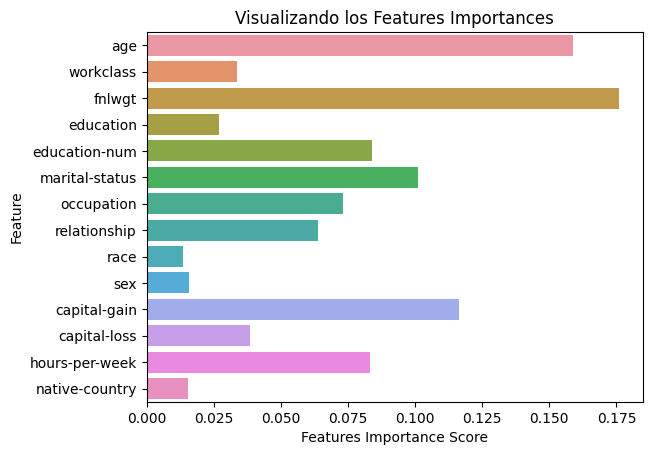

In [37]:
#Grafico de barras
import seaborn as sns
import matplotlib.pyplot as plt

importances = random_forest.feature_importances_
columns = X.columns

sns.barplot(x=importances , y = columns)
plt.xlabel('Features Importance Score')
plt.ylabel('Feature')
plt.title("Visualizando los Features Importances")
plt.show()

In [38]:
# Matriz de confusion del RF
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_test_pred_rf)

print('Matriz de Confusion\n\n', cm)

Matriz de Confusion

 [[9506  752]
 [1312 1997]]


In [39]:
#RF
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     10258
           1       0.73      0.60      0.66      3309

    accuracy                           0.85     13567
   macro avg       0.80      0.77      0.78     13567
weighted avg       0.84      0.85      0.84     13567

